In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
drive_dataset_path = "/content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/"

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(drive_dataset_path+"Train/")
data_dir_test = pathlib.Path(drive_dataset_path+"Test/")

In [5]:
#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
#Create a dataset
#Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#Use 80% of the images for training, and 20% for validation.

In [7]:
#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
#All the classes of skin cancer.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
#Visualize the data

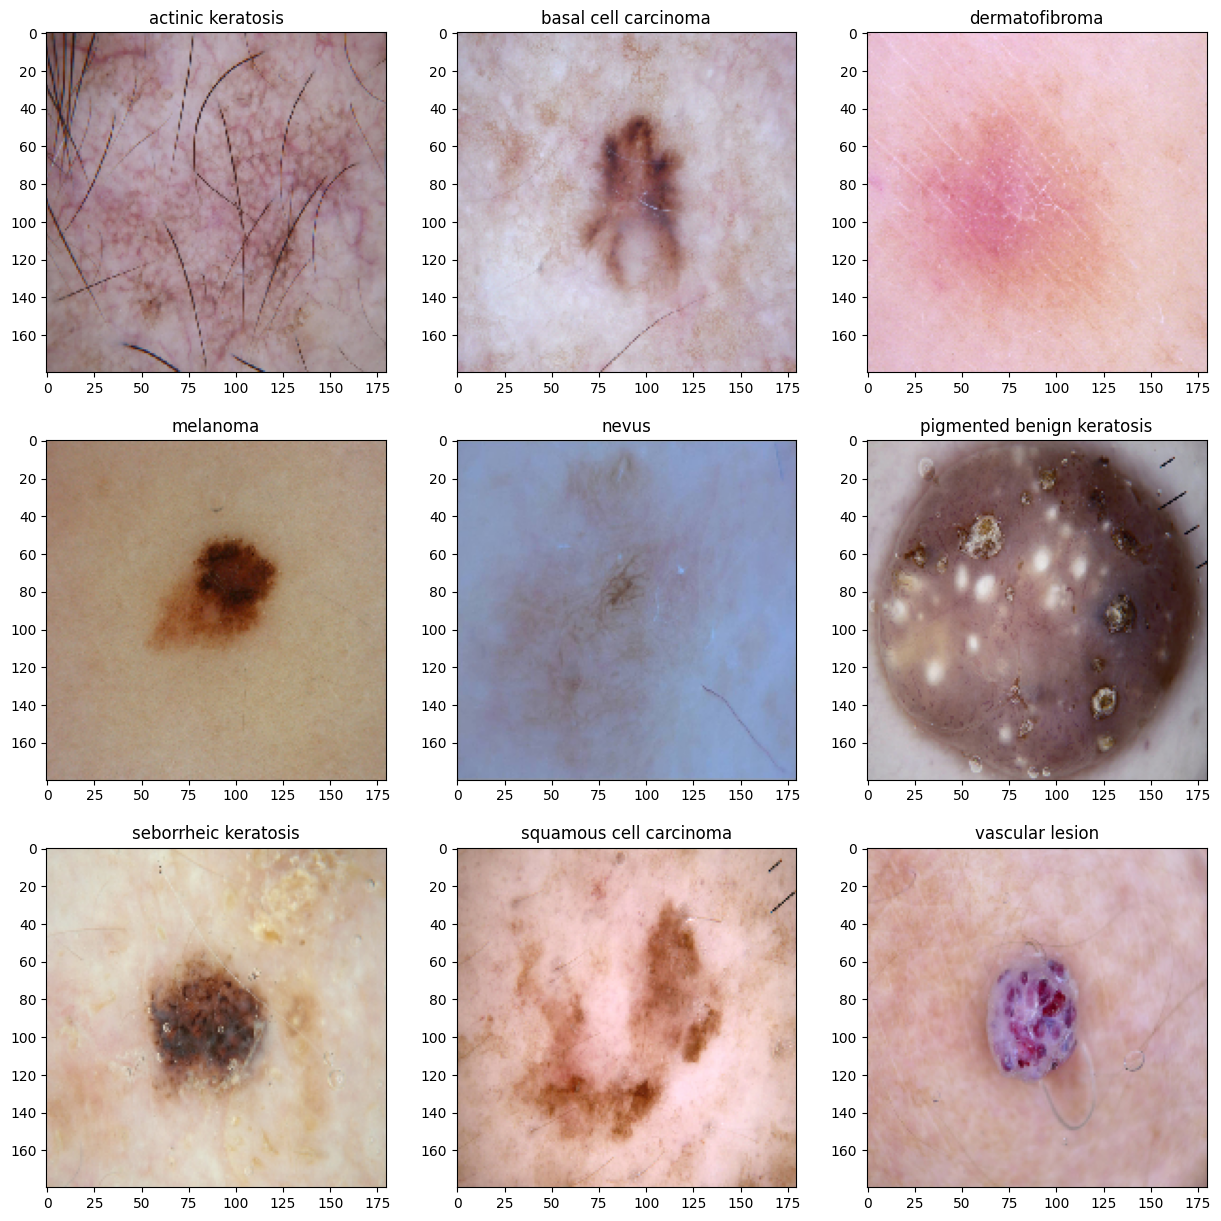

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [ ]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model Creation

In [13]:
img_height = 180
img_width = 180
input_shape = (img_height,img_width,3)

model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

model = Sequential() #Sequential allows you to create models layer-by-layer

#First Convulation Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


img_height = 180
img_width = 180
input_shape = (img_height,img_width,3)

model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

model = Sequential() #Sequential allows you to create models layer-by-layer

#First Convulation Layer
#The Rescaling layer has been moved to keras.layers.preprocessing
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model

In [15]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
# summary of all layers
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 812s 6s/step - accuracy: 0.2098 - loss: 2.2374 - val_accuracy: 0.3579 - val_loss: 1.7844
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.3973 - loss: 1.6905 - val_accuracy: 0.4922 - val_loss: 1.5210
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.4603 - loss: 1.5820 - val_accuracy: 0.4765 - val_loss: 1.4816
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.5117 - loss: 1.3740 - val_accuracy: 0.4989 - val_loss: 1.4247
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.5491 - loss: 1.2933 - val_accuracy: 0.5011 - val_loss: 1.4564
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.5087 - loss: 1.3133 - val_accuracy: 0.5414 - val_loss: 1.4003
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.5833 - loss: 1.1602 - val_accuracy: 0.5056 - val_loss: 1.4570
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.6016 - loss: 1.0960 - val_accuracy: 0.5123 - v

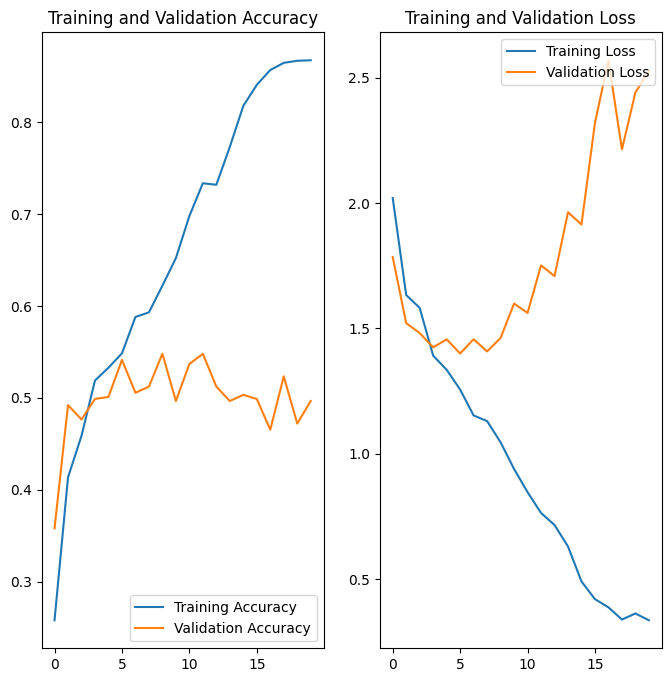

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Model is overfitting. From the above Training vs Validation accuracy graph we can see that as the epoch increases the difference between
#Training accuracy and validation accuracy increases.

In [21]:
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Define the image height and width
img_height = 224
img_width = 180

# Define the input shape
input_shape = (img_height, img_width, 3)

# Create the model
model = Sequential()  # Sequential allows you to create models layer-by-layer

# Data augmentation strategy
rescale = tf.keras.Sequential([
  # To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  # Randomly flip each image horizontally and vertically
  layers.RandomFlip("horizontal_and_vertical"),

  # Randomly rotate each image
  layers.RandomRotation(0.2),

  # Randomly zoom each image during training
  layers.RandomZoom(0.2),

  # Randomly translate each image during training
  layers.RandomTranslation(0.1, 0.1)
])

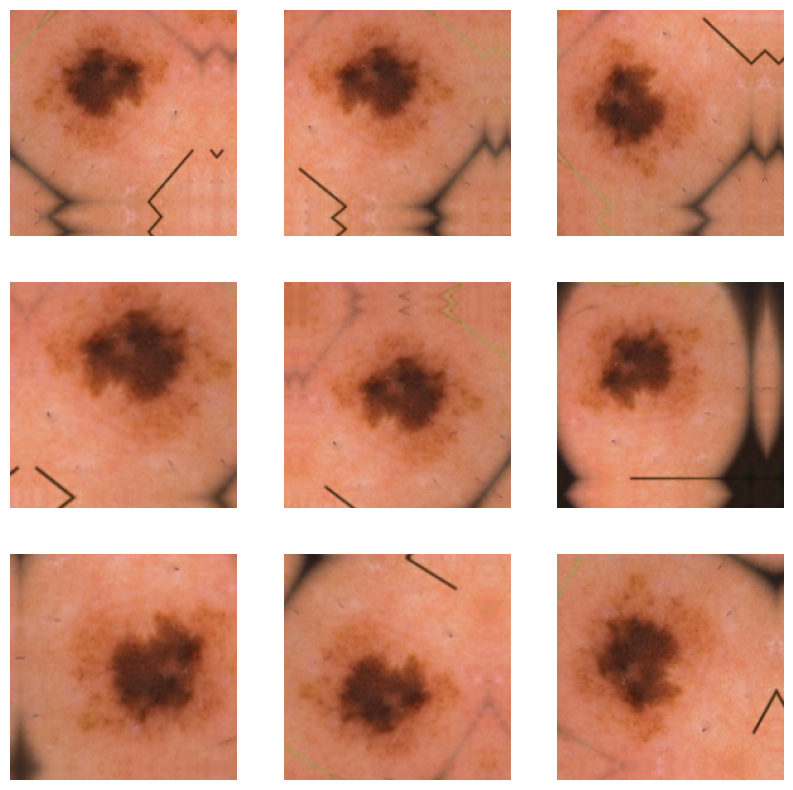

In [22]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [ ]:
#Compiling the model

In [24]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
#Training the model

In [25]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.1728 - loss: 2.8940 - val_accuracy: 0.1924 - val_loss: 2.0312
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.1878 - loss: 2.0807 - val_accuracy: 0.2931 - val_loss: 1.9862
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.2426 - loss: 1.9749 - val_accuracy: 0.3132 - val_loss: 1.9331
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.2755 - loss: 1.9334 - val_accuracy: 0.3490 - val_loss: 1.8337
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.3149 - loss: 1.8465 - val_accuracy: 0.2931 - val_loss: 1.9656
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.2860 - loss: 1.9093 - val_accuracy: 0.3669 - val_loss: 1.7351
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.3358 - loss: 1.7657 - val_accuracy: 0.3826 - val_loss: 1.7035
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.3715 - loss: 1.6895 - val_accuracy: 0.4072 - v

In [ ]:
#Visualizing training results

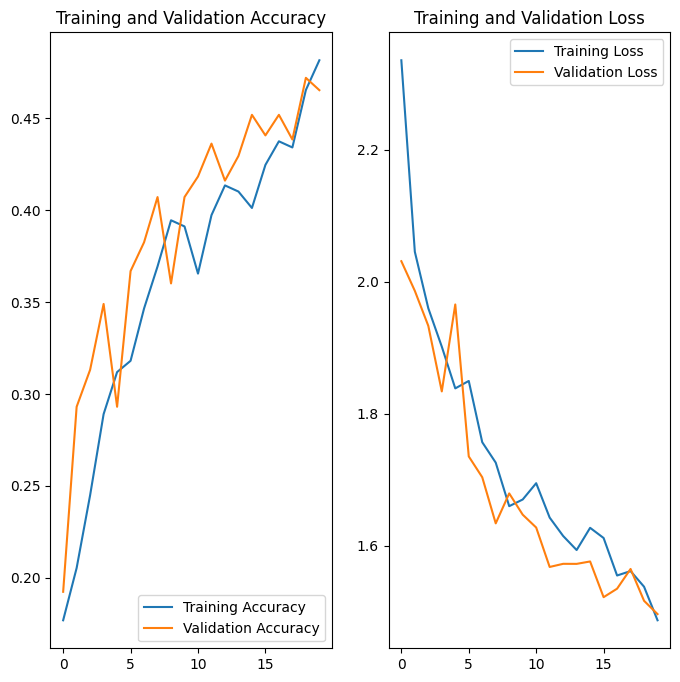

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Model is overfitting. From the above Training vs Validation accuracy graph we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases.

In [28]:
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Define the image height and width
img_height = 224
img_width = 180

# Define the input shape
input_shape = (img_height, img_width, 3)

# Create the model
model = Sequential()  # Sequential allows you to create models layer-by-layer

# Data augmentation strategy
rescale = tf.keras.Sequential([
  # To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  # Randomly flip each image horizontally and vertically
  layers.RandomFlip("horizontal_and_vertical"),

  # Randomly rotate each image
  layers.RandomRotation(0.2),

  # Randomly zoom each image during training
  layers.RandomZoom(0.2),

  # Randomly translate each image during training
  layers.RandomTranslation(0.1, 0.1)
])

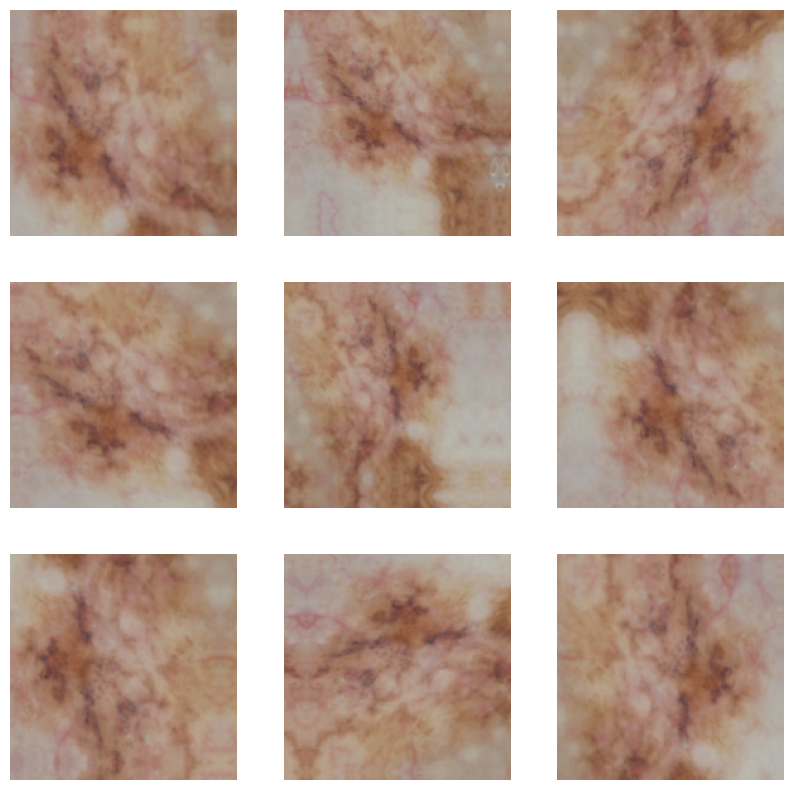

In [29]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [30]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [ ]:
#Compiling the model

In [31]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [ ]:
#Visualizing the results

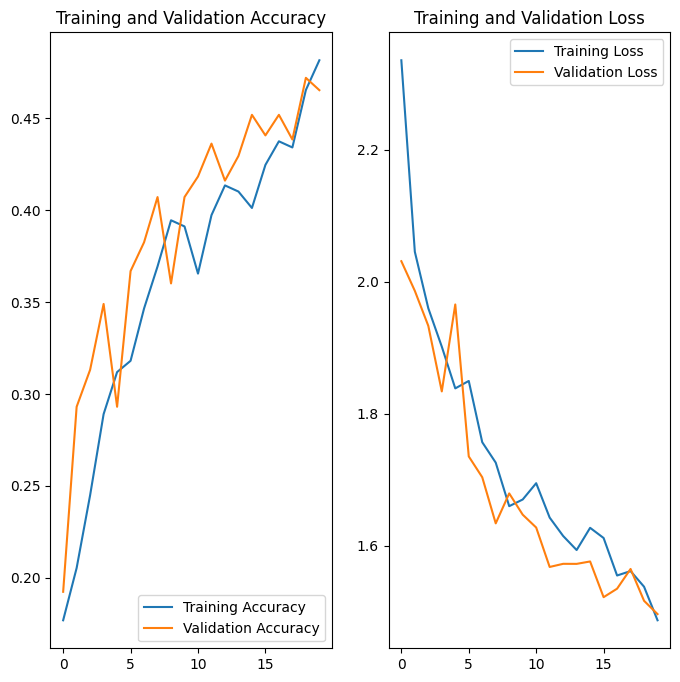

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#After using data augumentation and dropout layer overfitting issue is reduce.

#Model Performance is still not increased. Will check the distribution of classes in the training set to check is there have class imbalance.

In [ ]:
#Class Imbalance Detection

In [33]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

Class  No. of Image
0                    melanoma           438
1              dermatofibroma            95
2             vascular lesion           139
3        basal cell carcinoma           376
4     squamous cell carcinoma           181
5           actinic keratosis           114
6                       nevus           357
7  pigmented benign keratosis           462
8        seborrheic keratosis            77

<Axes: xlabel='No. of Image', ylabel='Class'>

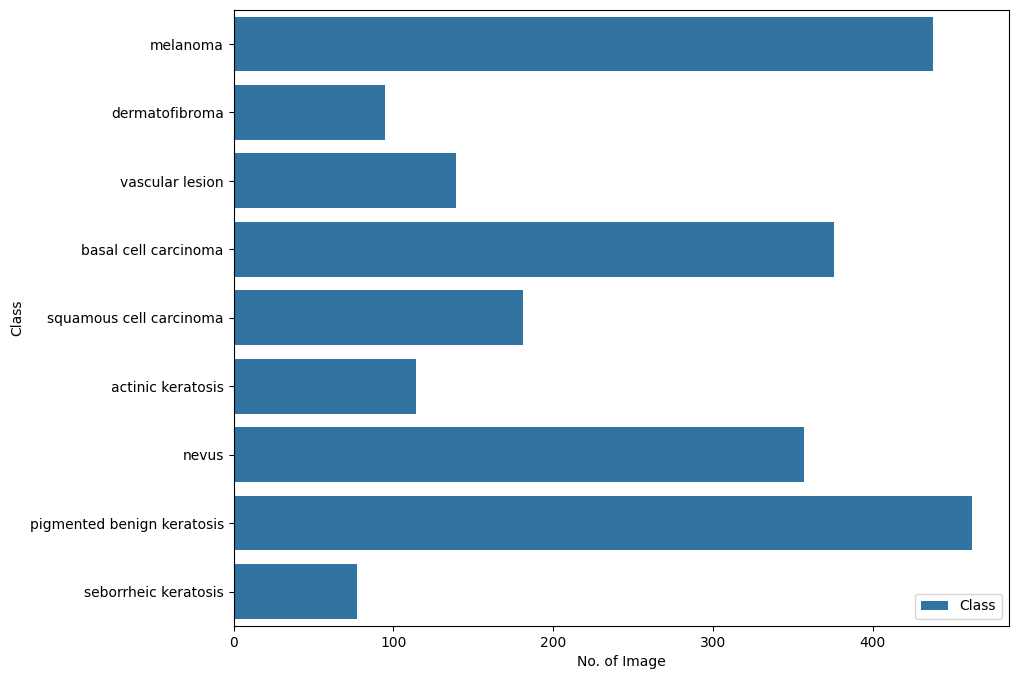

In [34]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [ ]:
#seborrheic keratosis has the least number of samples only 77.
#pigmented benign keratosis (462 Samples), melanoma (438 Samples), basal cell carcinoma (376 Samples), and nevus (357 Samples) classes dominates the data in terms proportionate number of samples .

In [ ]:
#Rectify the class imbalance
#Use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

In [ ]:
#To use Augmentor, the following general procedure is followed:

#Instantiate a Pipeline object pointing to a directory containing your initial image data set.
#Define a number of operations to perform on this data set using your Pipeline object.
#Execute these operations by calling the Pipeline’s sample() method.

In [36]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path(str(path_to_training_dataset) +'/'+ i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8C78335240>: 100%|██████████| 500/500 [00:26<00:00, 18.65 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8C7D0FE350>: 100%|██████████| 500/500 [00:28<00:00, 17.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A8C5C6446A0>: 100%|██████████| 500/500 [00:28<00:00, 17.27 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A8C5D22F130>: 100%|██████████| 500/500 [01:51<00:00,  4.50 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=957x640 at 0x7A8C60214EB0>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A8C5BA6A830>: 100%|██████████| 500/500 [00:27<00:00, 18.09 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A8C60067820>: 100%|██████████| 500/500 [00:57<00:00,  8.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8C783347C0>: 100%|██████████| 500/500 [00:26<00:00, 18.64 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8C5F8454E0>: 100%|██████████| 500/500 [00:27<00:00, 18.04 Samples/s]


In [ ]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
#see the distribution of augmented data after adding new images to the original training data.

In [38]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [40]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [41]:
#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [42]:
#label count.
df2['Label'].value_counts()

Label
melanoma                      500
dermatofibroma                500
vascular lesion               500
basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
Name: count, dtype: int64

In [ ]:
#Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#Create a training dataset

In [44]:
#data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
#Create a validation dataset

In [45]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
#Create model

In [46]:
#Model

model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

In [ ]:
#Compile Model

In [47]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
#Visualize the model results

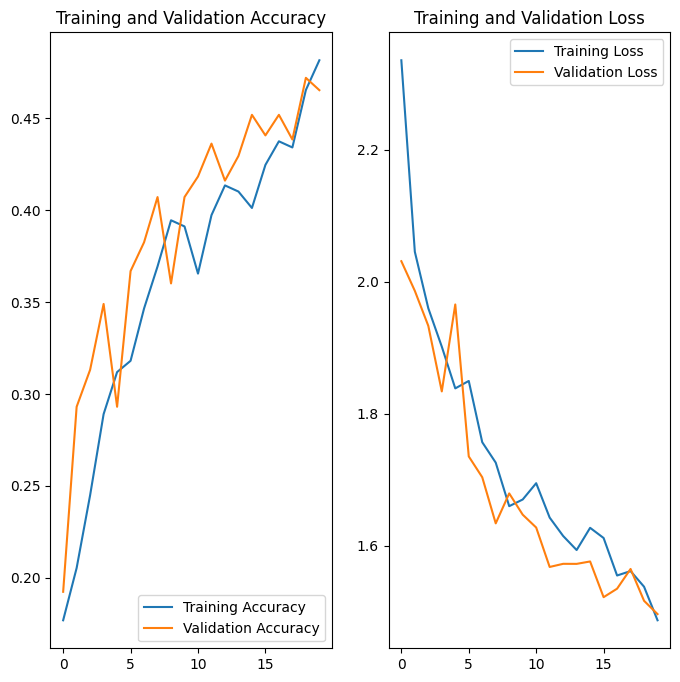

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#As per the final model (model3) Training accuracy and validation accuracy increases.
#Model overfitting issue is solved.
#Class rebalance helps in augmentation and achieving the best Training and validation accuracy.

In [ ]:
#Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis


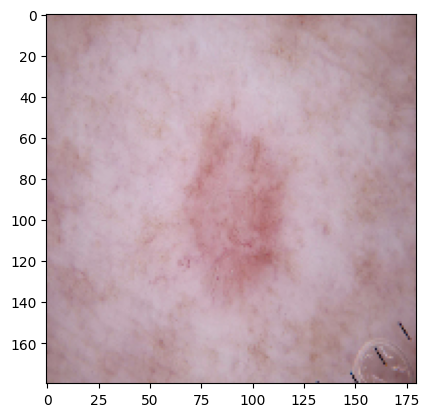

In [51]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )